## Visualization in python cont'd

In [1]:
# set up your environment 
import numpy as np 
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns 

print('done')

done


# Seaborn 
### features

- inbuilt datasets

- ploting 

In [2]:
# to view the datasets in seaborn 

# https://github.com/mwaskom/seaborn-data

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [2]:
tips = sns.load_dataset('tips')

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
iris = sns.load_dataset('iris')

In [12]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [13]:
titanic.shape

(891, 15)

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [15]:
titanic.isna().sum() # no. of row with NA values 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [18]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# plotting with seaborn

In [19]:
# there are diff kinds of plots e.g catplot, histplot etc.

In [20]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

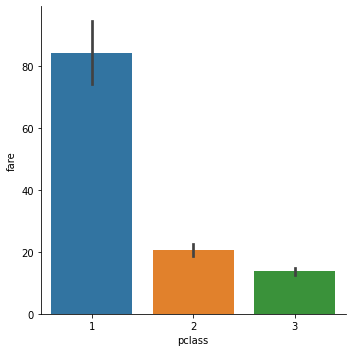

In [29]:
sns.catplot(data=titanic, kind='bar', y='fare',x='pclass')

<AxesSubplot:xlabel='age', ylabel='fare'>

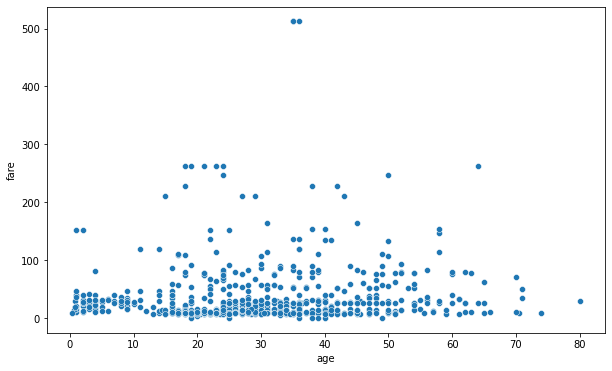

In [5]:
# sns.set_style('darkgrid') # add matplot style
plt.figure(figsize=(10,6)) # customise fig size
sns.scatterplot(data=titanic, y='fare',x='age')

### matplot vs seaborn plot

In [6]:
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x, np.sin(x + i * 5)* (7 - i) * flip)

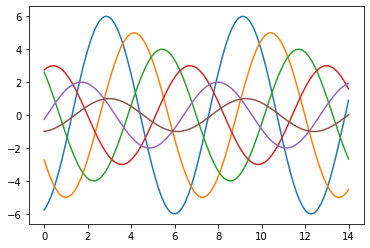

In [7]:
sinplot()

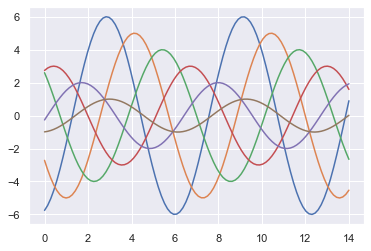

In [8]:
sns.set_theme()
sinplot()

# Statistical concepts

# Categorical Data

Examples :  Gender, hair color, jobs, race, educational qualification

Analysis of categorical data is usually best with the use of data tables 

Matrix - two-way table

- present your categorical date by counting the number of observations

- separating them into relevant  groups

- e.g class survey, hair color and jobs 

# Nominal Data

this is defined as data that is used for naming purpose. e.g naming or labelling

there is usually no instrinsic order to nominal data e.g country of origin, male or female(we can't say male comes before female)

For analysis of nominal data - use percentage or mode of the distribution

# Ordinal Data

this type of categorical data has an order to the variables

the variables are listed in an ordered manner, they are usually numbered to indicate the order of the list

For analysis of ordinal data -  use mean, mode, median, percentiles etc.

# Measures of central tendency 

In [11]:
# mean, median, mode

In [12]:
# mean is the average of a set of values

In [15]:
avg = titanic.fare.sum() / len(titanic.fare)

In [17]:
avg # average fare paid

32.204207968574636

In [20]:
# you create a function
def findAvg(x):
    """this function calculates the average of a list of values"""
    return sum(x) / len(x)

In [21]:
findAvg(titanic.fare)

32.2042079685746

In [22]:
findAvg?

Signature: findAvg(x)
Docstring: this function calculates the average of a list of values
File:      c:\users\ogwumike\appdata\local\temp\ipykernel_13952\788702630.py
Type:      function


In [36]:
# clean the nans before finding the average
titanic.age.fillna(0, inplace=True)
findAvg(titanic.age)

23.79929292929293

In [37]:
# Median 
# Middle value when the values are sorted

In [38]:
age = titanic.age

In [42]:
age_sorted = age.sort_values() 
# pandas series use sort_values() to sort

In [46]:
age_sorted[len(age_sorted) // 2]

4.0

In [47]:
age_sorted

667     0.0
128     0.0
533     0.0
284     0.0
538     0.0
       ... 
116    70.5
493    71.0
96     71.0
851    74.0
630    80.0
Name: age, Length: 891, dtype: float64

In [64]:
prices = [45, 56, 34, 98, 12, 30, 29, 68, 25, 75, 65]

In [65]:
prices

[45, 56, 34, 98, 12, 30, 29, 68, 25, 75, 65]

In [66]:
prices.sort()

In [67]:
prices

[12, 25, 29, 30, 34, 45, 56, 65, 68, 75, 98]

In [68]:
no_prices = len(prices)

In [71]:
no_prices // 2 # floor divison

5

In [72]:
prices[5]

45

# Numpy has mean, median

In [73]:
np.mean(prices)

48.81818181818182

In [74]:
np.median(prices)

45.0

### Mode 
Scipy library has a method we can use

In [75]:
import scipy
from scipy import stats

In [77]:
print(prices)
prices = [45, 56, 34, 98, 12, 30, 29, 68, 25, 75, 65, 34]
# mode
print(stats.mode(prices))

[12, 25, 29, 30, 34, 45, 56, 65, 68, 75, 98]
ModeResult(mode=array([34]), count=array([2]))


# Read
Variance

Standard Deviation

Percentiles